In [294]:
#import libraries and setup sql cursor
import sqlite3
import pandas as pd
from bs4 import BeautifulSoup
import requests 
import matplotlib.pyplot as plt
import seaborn as sb

conn = sqlite3.connect('data/movies.db')
cur = conn.cursor()

## Get bom and rotten tomatoe data and merge them into one with overlapping values(inner)

In [295]:
#get rotten tomatoe data
rt_movies = pd.DataFrame(cur.execute("SELECT * FROM rotten_tomatoes_movies").fetchall())
rt_movies.columns = [i[0] for i in cur.description]

In [296]:
#get bom movie data
bom_movie_gross = pd.DataFrame(cur.execute("SELECT foreign_gross, domestic_gross, title from bom_movie_gross").fetchall())
bom_movie_gross.columns = [i[0] for i in cur.description]
bom_movie_gross = bom_movie_gross[bom_movie_gross["foreign_gross"].notna()]

In [297]:
#create merged dataframe of rotten tomatoe and bom movies
bom_gross_rt_genre = rt_movies.join(bom_movie_gross, how="inner")

In [298]:
#drop na values from rotten tomatoe and bom movie merge
bom_gross_rt_genre.dropna(inplace=True)

In [299]:
not_list_format =  bom_gross_rt_genre

In [300]:
#sc
not_list_format.head()

,idx,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,...,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,foreign_gross,domestic_gross,title
0,0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,149.0,Spilled,53.0,254421.0,43,73,76,652000000,415000000.0,Toy Story 3
1,1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,142.0,Upright,64.0,11574.0,44,123,19,691300000,334200000.0,Alice in Wonderland (2010)
2,2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,24.0,Spilled,53.0,14684.0,2,16,8,664300000,296000000.0,Harry Potter and the Deathly Hallows Part 1
3,3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,54.0,Upright,97.0,105386.0,6,54,0,535700000,292600000.0,Inception
4,4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,27.0,Upright,74.0,68918.0,5,24,3,513900000,238700000.0,Shrek Forever After


## get list of unique genres

In [301]:
#reformat genres data go make it a list of items
def get_unique_genres(raw_genres):
    all_genres = []
    genres = raw_genres.str.replace("&", ",")
    genres = raw_genres.str.split(',')
    for item in genres:
        if item != None:
            for genre in item:
                all_genres.append(genre)
    unique_genres = set(all_genres)
    unique_genres = set([(genre.strip()) for genre in unique_genres])
    return unique_genres
get_unique_genres(bom_gross_rt_genre["genres"])

{'Action & Adventure',
 'Animation',
 'Art House & International',
 'Classics',
 'Comedy',
 'Cult Movies',
 'Documentary',
 'Drama',
 'Faith & Spirituality',
 'Horror',
 'Kids & Family',
 'Musical & Performing Arts',
 'Mystery & Suspense',
 'Romance',
 'Science Fiction & Fantasy',
 'Special Interest',
 'Sports & Fitness',
 'Television',
 'Western'}

In [302]:
def get_unique_content_ratings(raw_content_ratings):
    all_content_ratings = []
    for rating in raw_content_ratings:
        all_content_ratings.append(rating)
    unique_content_ratings = set(all_content_ratings)
    return unique_content_ratings
unique_content_ratings = get_unique_content_ratings(action["content_rating"])

In [315]:
def get_unique_directors(raw_directors):
    all_directors = []
    clumped_directors = []
    clumped_directors = raw_directors.str.split(",")
    for row in clumped_directors:
        if row != None:
            for director in row:
                all_directors.append(director)
    unique_directors = set(all_directors)
    unique_directors = [(director.strip()) for director in unique_directors]
    return unique_directors
unique_directors = get_unique_directors(action["directors"])

# Get data based off a certain genre from bom and rotten tomatoe merge

In [305]:
#function makes new databse with just a certain column
def get_genre_db(db, genre):
    return db[db["genres"].str.contains(genre)]

In [230]:
action = get_genre_db(bom_gross_rt_genre, "Action")

### gross by audience rating

In [246]:
action.sort_values("domestic_gross", ascending=False, inplace=True)

<ipython-input-246-47bf76bb8dfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action.sort_values("domestic_gross", ascending=False, inplace=True)


In [275]:
#sc
action.columns

Index(['idx', 'rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'foreign_gross', 'domestic_gross', 'title'],
      dtype='object')

In [279]:
#sc
action[10:20]

,idx,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,...,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,foreign_gross,domestic_gross,title
4,4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,27.0,Upright,74.0,68918.0,5,24,3,513900000.0,238700000.0,Shrek Forever After
1139,1139,m/1075984-iron_monkey,Iron Monkey,"In a desperate and unjust land, where governme...",Iron Monkey may not have the poetic lyricism o...,PG-13,"Action & Adventure, Art House & International,...",Woo-ping Yuen,"Hark Tsui, Tang Pik-Yin, Lau Tai-Muk, Cheung T...","Rongguang Yu, Donnie Yen, Jean Wang, Tsang Sze...",...,96.0,Upright,86.0,19366.0,28,87,9,258399999.0,234900000.0,Oz The Great and Powerful
1140,1140,m/1076097-mchales_navy,McHale's Navy,Shopkeeper McHale (Tom Arnold) is called back ...,"About as funny as a keelhauling, McHale's Navy...",PG,"Action & Adventure, Comedy",Bryan Spicer,Peter Crabbe,"Tom Arnold, Tim Curry, Dean Stockwell, David A...",...,29.0,Spilled,38.0,9193.0,7,1,28,238600000.0,228800000.0,Star Trek Into Darkness
2772,2772,m/angels_with_dirty_faces,Angels with Dirty Faces,Rocky Sullivan (James Cagney) and Jerry Connol...,James Cagney's explosive charisma and Pat O'Br...,NR,"Action & Adventure, Classics, Drama, Mystery &...",Michael Curtiz,"Warren Duff, John Wexley, Rowland Brown","James Cagney, Pat O'Brien, Ann Sheridan, Humph...",...,22.0,Upright,92.0,9539.0,0,22,0,392700000.0,226300000.0,Logan (2017)
738,738,m/1019544-spartacus,Spartacus,"The rebellious Thracian Spartacus, born and ra...",Featuring terrific performances and epic actio...,PG-13,"Action & Adventure, Classics, Drama",Stanley Kubrick,Dalton Trumbo,"Kirk Douglas, Laurence Olivier, Jean Simmons, ...",...,61.0,Upright,87.0,78097.0,9,57,4,330600000.0,218800000.0,Ted
3089,3089,m/back_to_the_future_3,Back to the Future Part III,"In this final chapter, Marty McFly (Michael J....",Back to the Future Part III draws the trilogy ...,PG,"Action & Adventure, Comedy, Science Fiction & ...",Robert Zemeckis,"Bob Gale, Robert Zemeckis","Michael J. Fox, Christopher Lloyd, Mary Steenb...",...,45.0,Upright,78.0,694736.0,10,36,9,406000000.0,216600000.0,Ant-Man and the Wasp
334,334,m/1002993-boys_from_brazil,The Boys from Brazil,Dr. Josef Mengele (Gregory Peck) clones Hitler...,"Its story takes some dubious turns, but a high...",R,"Action & Adventure, Drama, Mystery & Suspense",Franklin J. Schaffner,Heywood Gould,"Gregory Peck, Laurence Olivier, James Mason, L...",...,32.0,Upright,66.0,7692.0,5,22,10,416300000.0,209800000.0,Fast Five
1502,1502,m/1152954-new_world,The New World,Arriving with a British expedition in Virginia...,Despite arresting visuals and strong lead perf...,PG-13,"Action & Adventure, Drama, Romance",Terrence Malick,Terrence Malick,"Colin Farrell, Q'Orianka Kilcher, Christopher ...",...,188.0,Spilled,58.0,148107.0,46,118,70,139600000.0,191700000.0,22 Jump Street
1885,1885,m/15_minutes,15 Minutes,"At the center of ""15 Minutes"" is a New York Ci...",As critical as it is about sensationalism in t...,R,"Action & Adventure, Drama, Mystery & Suspense,...",John Herzfeld,John Herzfeld,"Robert De Niro, Edward Burns, Kelsey Grammer, ...",...,125.0,Spilled,37.0,50652.0,33,40,85,339100000.0,180200000.0,Ant-Man
736,736,m/1019441-sorcerer,Sorcerer,"In the small South American town of Porvenir, ...","Sorcerer, which obstinately motors along on it...",PG,"Action & Adventure, Mystery & Suspense",William Friedkin,Walon Green,"Roy Scheider, Bruno Cremer, Francisco Rabal, A...",...,39.0,Upright,83.0,3800.0,8,31,8,445000000.0,179000000.0,MIB 3


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Audience rating(/100)'),
 Text(0.5, 0, 'Domestic Gross(*100mil)'),
 Text(0.5, 1.0, 'some title')]

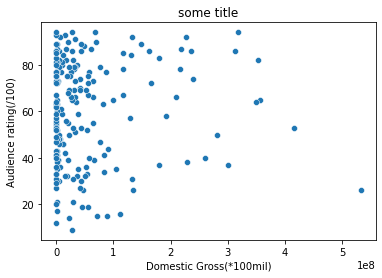

In [250]:
gross_rating = sb.scatterplot(action["domestic_gross"], action["audience_rating"])
gross_rating.set(ylabel ="Audience rating(/100)", xlabel = "Domestic Gross(*100mil)", title ='some title')

### content rating by audience rating

In [269]:
cr_ar = action.groupby(['content_rating'])['audience_rating'].mean().sort_values(ascending=False)

In [270]:
cr_ar

content_rating
NR       85.800000
G        71.909091
PG       61.617647
R        61.443182
PG-13    49.879310
Name: audience_rating, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Audience rating of 100'),
 Text(0.5, 0, 'Content Rating'),
 Text(0.5, 1.0, 'Audience rating based on content rating')]

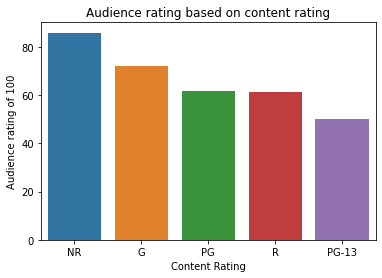

In [274]:
cr_ar_sb = sb.barplot(list(cr_ar.keys()), cr_ar)
cr_ar_sb.set(ylabel ="Audience rating of 100", xlabel = "Content Rating", title ='Audience rating based on content rating')

### mode director, top 10 audience rating mean by director

In [ ]:
action.groupby(['directors'])['audience_rating'].mean().sort_values(ascending=False)

In [318]:
def groupby_unformatted_column(df, unique, unique_category, aggregate_category):
    return_list = []
    for item in unique:
        frame = df[df[unique_category].str.contains(item)]
        aggregate = round(frame[aggregate_category].mean(), 1)
        return_list.append(aggregate)
    return return_list


In [323]:
audience_rating_by_director = groupby_unformatted_column(action, unique_directors, "directors", "audience_rating")

In [324]:
rating_director_dict = {"director": list(unique_directors), "audience_rating": audience_rating_by_director}

In [325]:
rating_director_df = pd.DataFrame(rating_director_dict)

In [329]:
rating_director_df.sort_values("audience_rating", inplace=True, ascending = False)

In [342]:
top_directors_by_rating = rating_director_df[0:5].concat(rating_director_df[-1:-6])

AttributeError: 'DataFrame' object has no attribute 'concat'

In [337]:
#sc
top_directors_by_rating

,director,audience_rating
162,James Cameron,94.0
116,Christopher Nolan,94.0
11,Francis Ford Coppola,94.0
119,Akira Kurosawa,93.0
100,Andrei Tarkovsky,93.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='audience_rating', ylabel='director'>

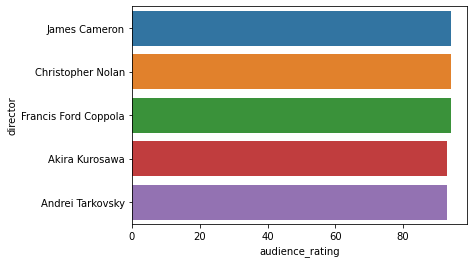

In [341]:
sb.barplot(top_directors_by_rating["audience_rating"], top_directors_by_rating["director"], orient = 'h')

In [205]:
#turn string values within foreign gross column into na and drop them
not_list_format["foreign_gross"] = not_list_format["foreign_gross"].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

## for loop through unique genres and get a mean gross for each to add to graph

In [206]:
d_gross = []
f_gross = []

for genre in unique_genres:
    frame = not_list_format[not_list_format["genres"].str.contains(genre)]
    mean_d_gross = round(frame["domestic_gross"].mean(), 1)
    mean_f_gross = round(frame["foreign_gross"].mean(), 1)
    d_gross.append(mean_d_gross)
    f_gross.append(mean_f_gross)

In [207]:
#turn gross lists and unique genres into dictionary in one variable
genre_grossing_dict = {"genre": list(unique_genres), "domestic_gross": d_gross, "foreign_gross": f_gross}

In [208]:
#genre_grossing = pd.DataFrame(genre_averages, columns =['genre', 'domestic_gross', 'foreign_gross'])
genre_grossing = pd.DataFrame(genre_grossing_dict)
# genre_grossing["genre"] = genre_averages.keys()
# genre_grossing["genre"] = [item[0] for item in genre_grossing.values()]

In [209]:
#set genres as index so I can drop stuff based on it
#genre_grossing.set_index("genre")

In [210]:
genre_grossing = genre_grossing[genre_grossing["genre"] != 'Cult Movies']
genre_grossing = genre_grossing[genre_grossing["genre"] != 'Television']
genre_grossing = genre_grossing[genre_grossing["genre"] != 'Classics']
genre_grossing = genre_grossing[genre_grossing["genre"] != 'Art House & International']

In [211]:
genre_grossing.sort_values("domestic_gross", ascending=False, inplace=True)

Text(0, 0.5, 'Genre')

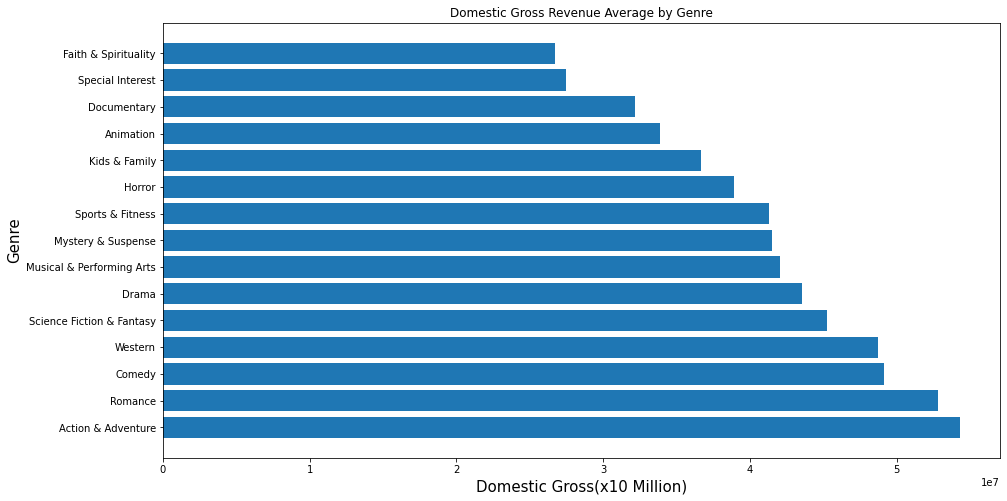

In [212]:
#make graph of mean gross by genre
fig, ax = plt.subplots(figsize= (15, 8))
ax.barh(genre_grossing["genre"], genre_grossing["domestic_gross"])
ax.set_title("Domestic Gross Revenue Average by Genre")
ax.set_xlabel("Domestic Gross(x10 Million)",fontsize=15)
ax.set_ylabel("Genre",fontsize=15)